# Calculating Fraction of Molecular Collisions #


CBE 60535, University of Notre Dame 

Problem 3.4 ( pg. 99 ) from Elements of Chemical Reaction Engineering by H. Scott Fogler, Fifth edition, 2016, ISBN: 978-0-13-388751-8. 


Prepared by: 

Yun Young Choi ychoi3@nd.edu 

Bingxin Yang byang3@nd.edu



## Learning Objectives: 

After completing this assignment, you should be able to: 


*   Apply integration techniques to Ordinary Differential Equations using Python
*   Plot multiple data on a single graph






## Intended Audiences: 

This problem is intended for undergraduate students in Chemical and Biomolecular Engineering students from the University of Notre Dame who have taken Chemical Reaction Engineering. 

**Useful link to review library:**

1. Plot

    https://ndcbe.github.io/data-and-computing/notebooks/01/Matplotlib.html?highlight=plot

2. Scipy

    https://ndcbe.github.io/data-and-computing/notebooks/07/Scipy-Library-Adaptive-Methods-for-Newton-Cotes-and-Gauss-Quadrature.html?highlight=scipy

3. Integral

    https://ndcbe.github.io/data-and-computing/notebooks/01/Functions-as-Arguments.html?highlight=integral

4. Ordinary Differential Equations

    https://ndcbe.github.io/data-and-computing/notebooks/07/Systems-of-Differential-Equations-and-Scipy.html?highlight=odes

5. Sympy

    https://scipy-lectures.org/packages/sympy.html



## Problem Statement:
Atoms and molecules have their own unique specific activation energy when undergoing reaction, and have specific minimum energy barriers that it must overcome, also known as barrier height. Now, we must know what fraction of molecular collisions have sufficient energy to cross over the barrier and react.

For reactions in the gas phase, the reacting molecules will not have only one velocity, $U$, but it will also have a distribution of velocities, $f(U,T)$. Some will have high velocities and some will have low velocities as they move around and collide. These velocities are not defined with respect to a fixed coordinate system; these velocities are defined with respect to the other reactant molecules. The Maxwell-Boltzmann distribution of relative velocities is given by the probability function, $f(U,T)$: 

\begin{equation}
f(U,T) = 4π(\frac{m}{2πk_BT})^{3/2}exp(\frac{-mU^2}{2k_BT})U^2....(Eq.1)
\end{equation}

$K_B$ = Boltzmann's constnat = 3.29 E-24 (cal/molecule/$K$) 

$m$ = Reduced mass $(g)$ 

$U$ = Relative velocity $(m/s)$ 

$T$= Absolute Temperature $(K)$ 

$e$ = Energy (kcal/molecule) 

$E$ = Kinetic energy (kcal/mol) 


Rather than using velocities to discuss the fraction of molecules with sufficient energy to cross the barrier, we convert these velocities to energies using the equation for kinetic energy in making this conversion:

\begin{equation}
e = \frac{1}{2}mU^{2}....(Eq.2)
\end{equation}

Using this substitute, the Maxwell Boltzmann probability distribution of collision with energy $e$ $(cal/molecule)$ at temperature $T$ is 

\begin{equation}
f(e,T) = 2π(\frac{1}{πk_BT})^{3/2}e^{1/2}exp(\frac{-e}{k_BT})....(Eq. 3)
\end{equation}

In terms of energy per mole, $E$, instead of energy per molecule, $e$ ,we have: 

\begin{equation}
f(E,T) = 2π(\frac{1}{πRT})^{3/2}E^{1/2}exp(\frac{-E}{RT})....(Eq.4)
\end{equation}

where $E$ is in $(cal/mol)$, $R$ is in $(cal/mol/K)$, and $f(E,T)$ is in $(mol/cal)$.

The distribution function $f(E,T)$ is most easily interpreted by recognizing that $[f(E,T),dE]$ is the **Fraction of Collision** with enerfies between $E$ and $E + dE$

\begin{equation}
f(E,T)dE = 2π(\frac{1}{πk_BT})^{3/2}E^{1/2}exp(\frac{-E}{k_BT})dE....(Eq.5)
\end{equation}

For example, the fraction of collisions with energies between 0.25 and 0.35 kcal/mol would be:

$$\int_{0.25}^{0.35} f(E,T)dE$$



## Import Libraries: 

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sympy.geometry.line import pi_coeff
from sympy import *
from scipy import integrate
from scipy.integrate import quad

## 1. Visualizing Fraction of Collisions

Plot the fraction of collision with energy per mole from 0 to 30 $kcal/mol$ for different given temperatures (T = 300, 500, 800 and 1200K). 

Hint: Fraction of collision as function of energy per mole, uses equation 4. 

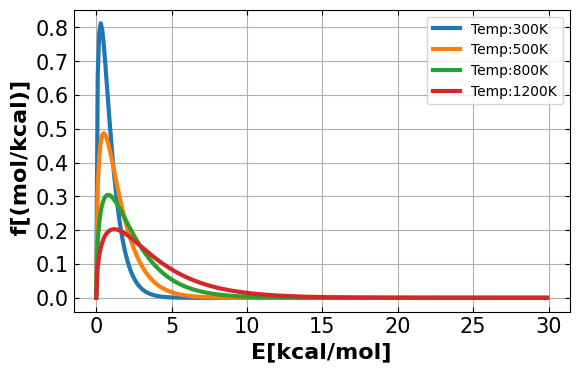

In [ ]:
# Gas constant needs to be converted into cal/k mol
R = 8.314*0.000239

# Generate an array of tempeartures for calculation based on the requirements
T = np.array([300,500,800,1200]) #unit: K
# Create an empty list to store Fraction of collions 
F= []  

pi = math.pi

plt.figure(figsize=(6.4,4), dpi=100) #Plot figure size 6.4x4 with 300 DPi
# Create a for loop for fraction of collisions calculation at different temperatures from 0 to 30 kcal/mol
#add your solution here
# Add your solution here

# Plot
plt.xticks(fontsize=15) #Tick font size 15
plt.yticks(fontsize=15)
plt.tick_params(direction="in",top=True, right=True) #Major tick direction: in
#plt.tick_params(which="minor",direction="in",top=True, right=True) #minor tick will make the graph look more crowded so is left out
plt.grid()
plt.xlabel('E[kcal/mol]', fontsize=16, fontweight = 'bold') #axis label font size: 16, bold
plt.ylabel(' f[(mol/kcal)]', fontsize=16, fontweight = 'bold') #axis label font size: 16, bold
plt.legend()
plt.show()

Discussion: Explain how the fraction of collisions change as a function of given temperatures as you see on the graph. 

**Answer**: When you look at the graph, you can see that fraction of collision increase with increasing temperature at $E$ = 5 kcal/mol. For kinetic energy lower than 5 kcal/mol, lower the temperature, the probability of collision is lower, therefore it will require more energy to get over the activation energy barrier. For higher temperature below $E$ = 5 kcal/mol, it will have more movement within itself that it require less energy.

## 2. Determining the Fraction of Molecules 
What is the fraction of molecules that have sufficient energy to pass over an energy barrier of 25 kcal at 300,500, 800 and 1200K. 

Hint: Perform integration of $f(E,T)$ from 0 to 25 kcal?

In [ ]:
# Regenerate an array of tempeartures for calculation based on the requirements

# Define a function for fraction of molecules that has sufficient energy to pass over an energy barrier calculation
def fraction(T):
  """Using integration to calculate the fraction of molecules from 0 to 25 kcal
    Args:
        T: temperature (K)
        E: Energy (per mole)
    Returns:
        f(E,T) : distribution of collision for energy per mole (mol/cal)
    """

  # Store fraction of molecules that does not have sufficient energy to pass over an energy barrier of 25 kcal in a list
  I = []

  # i in terms of the order of temperatures in T
  i = 0
   
  # Create a for loop for integration calculation at different temperatures
  # Add your solution here
  # Add your solution here

  return I 

Store the fraction of molecule you integrated above into `I1`.

In [ ]:
# Store data in I1 for the fraction
I1 =[]
# Add your solution here 
# Add your solution here

#Print I1 to confirm
print("Fraction from 300 K to 1200 K from intergation: \n", I1)

Fraction from 300 K to 1200 K from intergation: 
 [0.9999999999999933, 0.9999999999318481, 0.9999993178365589, 0.9998931593409495]


To get over an energy barrier, subtract fraction of molecule obtained from 1. 
Store answers as a list in `F_1`.

In [ ]:
# Create a list of fraction of molecules that has sufficient energy to pass over an energy barrier of 25 kcal from 300K to 1200 K
F_1 = [] #create an empty list

# i in terms of the temperature order in T1
i = 0

# Create a while loop that will calculate the fraction of molecules that has sufficient energy to pass over an energy barrier
# Add your solution here 
# Add your solution here

# Print results
print("Fraction of molecules that has sufficient energy to pass over an energy barrier of 25 kcal: \n", F_1)

Fraction of molecules that has sufficient energy to pass over an energy barrier of 25 kcal: 
 [6.661338147750939e-15, 6.815192854503493e-11, 6.821634410680844e-07, 0.0001068406590505333]


## 3. Calculating the Ratio of the Fraction of Energies

Create a list that shows fraction of energies between 0 and 25 kcal for 300 K and 1200 K. Store answer in `I2`


In [ ]:
# Define Temperature in a list T2 (300K and 1200K)
T1 = np.array([300,1200])

# Store the fraction from the integration in I2 to obtain the fraction at differnt given tempeartures
# Create an empty list I2
I2 =[]
# Add your solution here 
# Add your solution here

# print data
print("Fraction from 300 K to 1200 K from intergation: \n", I2)

Fraction from 300 K to 1200 K from intergation: 
 [0.9999999999999933, 0.9998931593409495]


Now, obtain the ratio using the `I2` obtained above comparing 300 K to 1200 K. 

In [ ]:
# define a list for ratio data store
R = []

#Add your solution here that will calculate and show the ratio here
# Add your solution here

# print the obtained ratio
print("Baseline resistance = {0:0.4f}".format(R))

Baseline resistance = 1.0000


### Additional Analysis

As mentioned above, The distribution function $f(E,T)$ is most easily interpreted by recognizing that $[f(E,T)dE]$ is the **Fraction of Collision** with energies between $E$ and $E + dE$


\begin{equation}
f(E,T)dE = 2π(\frac{1}{πk_BT})^{3/2}E^{1/2}exp(\frac{-E}{k_BT})dE....(Eq.5)
\end{equation}




The **Reaction of Collision** that have energies greater than a certain value, $E_{A}$ can be expressed as below: 

\begin{equation}
F(E>E_A,T) = \int_{E_A}^{∞} f(E,T)dE....(Eq.6)
\end{equation}




For $E_{A}$ > 3$RT$, analytical approximation for the fraction of molecules of collision with energies greater than $E_{A}$ as below can be obtained from equation 5 and 6 and integration: 

\begin{equation}
F(E>E_A,T) = (\frac{2}{{π}^{0.5}})(\frac{E_A}{RT})^{1/2}exp(\frac{-E_A}{RT})....(Eq.7)
\end{equation}

## 4. Fraction of Collisions that have Energies Greater Than a Certain Value, $E_A$.

### 4a. Manually integrate equation 5 to obtain the equation for fraction of collision from $E_A$ to infinite on your paper to get to equation 7.

Hint: Starting with equation 5, integrate from $E_A$ to infinity (shown as equation 6) and solve to get equation 7.

Hint 2: The constants in the equation can be grouped and substituted with constnat such as A and/or B. 

Hint 3: Use u-substition. 

Submit the written work via ***Gradescope***.

### 4b. Numeric Integration 

Design a code that will integrate equation 5 to equation 7 for you and compare the equation you have obtained from 4a (written part). 

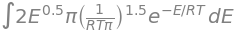

In [ ]:
# Integrate the equation
#Define symbols
init_printing(use_unicode=False, wrap_line=False)
E = Symbol('E')
pi = Symbol('pi')
R = Symbol('R')
T = Symbol('T')

# add your solution that shows integrated equation 
# Add your solution here

Hint: you will run into gamma when doing the integration. Gamma is shown below:

In [ ]:
# lower case gamma follows this equation shown below 
z = 1.5
E_A = Symbol('E_A')
t = E_A/(R*T)
gamma = (t**(z-1))*exp(-t)
print(gamma)


(E_A/(R*T))**0.5*exp(-E_A/(R*T))


Label the integrated equation (eq.7) as `y`

In [ ]:
#define the integrated equation as y 
#Add your solution here
# Add your solution here

### 4c. Visualization: 

Graph using the equation you have obtained from 4b for 700K.

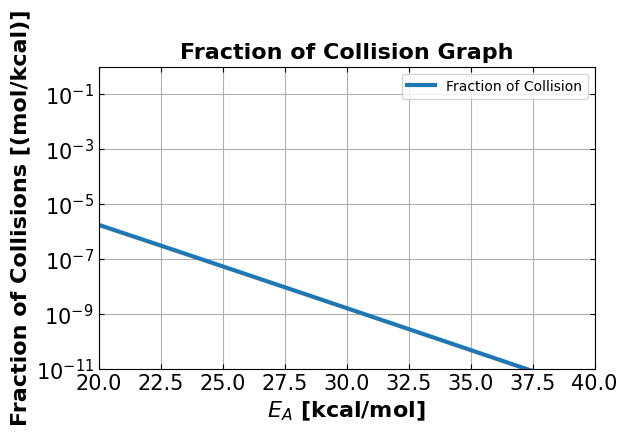

In [ ]:
# Add your solution here

### 4d. What fraction of collisions have energies greater than $E$ = 25 kcal/mol?

Hint: What is the y axis value when x = 25 kcal?

In [ ]:
# Define constants
E_A1 = 25 # unit: kcal

# Call the function F_C and calculate the fraction of collisions at 700K.
# Add your solution here
print("Fraction of collisions have energies greater than E = 25 kcal/mol at 700K: \n",F_C(E_A1,T2),"when E = 25 kcal")

Fraction of collisions have energies greater than E = 25 kcal/mol at 700K: 
 5.37835222623192e-08 when E = 25 kcal


### 4e. Visualization at different temperature:

Graph using the code you have obtained from 4b for 500K.

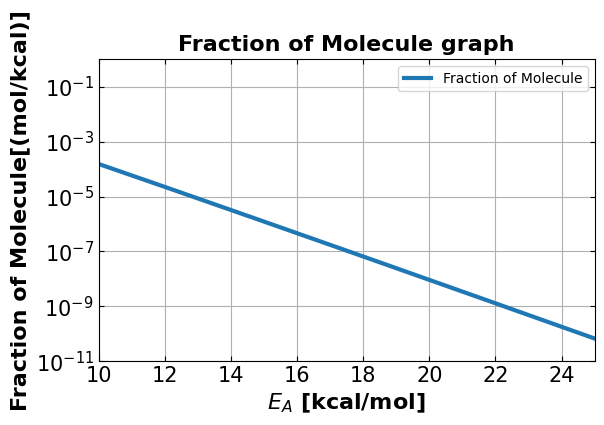

In [ ]:
#add your solution here to get the graph shown below
E_A2 = np.arange(0,40,0.01)
# define temperature for this problem
T3 = 500 #unit: K

# Call the funcation and calculate the fraction of collisions and create a semilog plot as shown in 4c.
#Add your solution here
# Add your solution here

### 4f. What fraction of molecules have energies greater than 15 kcal/mol at 500K?

In [ ]:
# Find F_500 when E = 25
# Add your solution here

print("F_500 is",F_C(E_A1, T3),"when E=15")

F_500 is 6.722248169794792e-11 when E=15


In [ ]:
# Find F_700 when E = 25
# Add your solution here

print("F_700 is",F_C(E_A1, T2),"when E=15")

F_700 is 5.37835222623192e-08 when E=15


Discussion: 
Compare fraction of collision(of molecules) with energies greater than 25 kcal/mol at 500K and 700K. Explain the results below.

**Answer**: 
The fraction increases at 700K of 3 order of magnitude. The rate increases with the increasing fraction of collisions that have sufficient energy to cross over the barrier and form products.

## 5. Fraction of Collisions at Various Temperatures

### 5a. Graph $f(E > E_A,T)$ versus $T$ for $E_A$ = 3, 10, 25 and 40 kcal/mol.


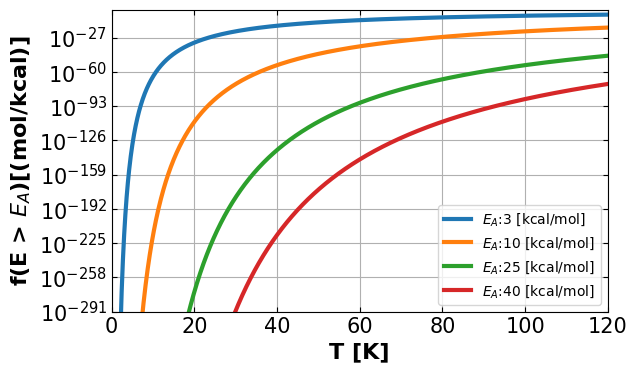

In [ ]:
# define constants and data storage
# make a list for fraction storage
F3 = []
# redefine the range of temperature
T4 = np.arange(1,120,0.1) # Unit: K
# make a list for energy
EA3 = [3,10,25,40] #unit: kcal

# i in terms of the order in energy EA3
i = 0

plt.figure(figsize=(6.4,4), dpi=100) #Figure size 4x4 with 300 DPi
# Create a loop for fraction calculation for different temperatures and to graph a semilog graph
# enter equation here 
# Add your solution here

# plot 
plt.grid()
plt.ylim([10E-292,1])
plt.xlim([0,120])
plt.xticks(fontsize=15) #Tick font size 15
plt.yticks(fontsize=15)
plt.tick_params(direction="in",top=True, right=True) #Major tick direction: in
#plt.tick_params(which="minor",direction="in",top=True, right=True) #minor tick will make the graph look more crowded so is left out
plt.xlabel('T [K]', fontsize=16, fontweight = 'bold') #axis label font size: 16, bold
plt.ylabel('f(E > $E_A$)[(mol/kcal)]', fontsize=16, fontweight = 'bold') #axis label font size: 16, bold


plt.legend()
plt.show()

Discussion: 
What do you find from the plot from above?

**Answer**: 

From the graph, it can be seen that any temperature the fraction of collisions with  energies greater than certain activation energy $(E_A)$ is inversely proportional to that activation  energy. In other words, when activation energy is low, the molecule will need less energy to get over  the activation energy barrier. At a higher temperature, the temperature will be the governing rule  for $f$. 
